<a href="https://colab.research.google.com/github/shekharashishraj/Predicting-billboard-hits-using-spotify-data/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import io
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MSD_Features.csv to MSD_Features (1).csv


In [ ]:
#Reading CSV File
songs=pd.read_csv(io.StringIO(uploaded['MSD_Features.csv'].decode('utf-8')))
songs.head()

,0,1,2,3,4,5,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Sonora Santanera,Las Numero 1 De La Sonora Santanera,Amor De Cabaret,2016,TRAAADZ128F9348C2E,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027
1,JennyAnyKind,I Need You,Young Boy Blues,2000,TRAAAVO128F93133D4,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907
2,Casual,Fear Itself,I Didn't Mean To,1994,TRAAAAW128F429D538,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.553,92.224,218933
3,Jeff And Sheri Easter,Ordinary Day,The Moon And I (Ordinary Day Album Version),2006,TRAAAMO128F1481E7F,7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.286,147.565,267640
4,Tweeterfriendly Music,Gin & Phonic,Drop of Rain,2003,TRAAAPK128E0786D96,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.185,100.315,189560


In [ ]:
songs.drop(columns=['4'],inplace=True)
songs.head()

,0,1,2,3,5,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Sonora Santanera,Las Numero 1 De La Sonora Santanera,Amor De Cabaret,2016,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027
1,JennyAnyKind,I Need You,Young Boy Blues,2000,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907
2,Casual,Fear Itself,I Didn't Mean To,1994,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.553,92.224,218933
3,Jeff And Sheri Easter,Ordinary Day,The Moon And I (Ordinary Day Album Version),2006,7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.286,147.565,267640
4,Tweeterfriendly Music,Gin & Phonic,Drop of Rain,2003,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.185,100.315,189560


In [ ]:
songs.rename(columns={'0':'Artist','1':'Album','2':'Track','3':'year','5':'ID'},inplace=True)

In [ ]:
songs

,Artist,Album,Track,year,ID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Sonora Santanera,Las Numero 1 De La Sonora Santanera,Amor De Cabaret,2016,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.6760,102.463,183027
1,JennyAnyKind,I Need You,Young Boy Blues,2000,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.2030,146.609,218907
2,Casual,Fear Itself,I Didn't Mean To,1994,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.5530,92.224,218933
3,Jeff And Sheri Easter,Ordinary Day,The Moon And I (Ordinary Day Album Version),2006,7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.2860,147.565,267640
4,Tweeterfriendly Music,Gin & Phonic,Drop of Rain,2003,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.1850,100.315,189560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,David Arkenstone,Return Of The Guardians,The Forgotten Lands,1996,7xV2k7FEMtUT4IUu4L87it,0.562,0.525,9,-14.594,1,0.0283,0.456000,0.883000,0.3110,0.7130,141.957,314533
5599,Moonspell,Sin / Pecado,The Hanged Man,1998,3e0tyTV5FiV1bcYeRjdDz2,0.404,0.636,4,-8.798,0,0.0325,0.064300,0.653000,0.0795,0.0979,140.105,386333
5600,Seventh Day Slumber,Once Upon A Shattered Life,Shattered Life,2005,2CQwzG5nbS7ys8CHSlavVg,0.406,0.895,2,-5.282,0,0.0563,0.000429,0.000033,0.1200,0.2780,150.326,209693
5601,It Dies Today,Sirens,One the road (to Damnation),2006,0MS1NrmBWaCpPLFEXV0VMZ,0.329,0.963,4,-3.501,1,0.1450,0.000019,0.001380,0.2220,0.2050,116.847,179413


In [ ]:
print(pd.unique(songs['mode']))

[1 0]


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            5603 non-null   object 
 1   Album             5603 non-null   object 
 2   Track             5603 non-null   object 
 3   year              5603 non-null   int64  
 4   ID                5603 non-null   object 
 5   danceability      5603 non-null   float64
 6   energy            5603 non-null   float64
 7   key               5603 non-null   int64  
 8   loudness          5603 non-null   float64
 9   mode              5603 non-null   int64  
 10  speechiness       5603 non-null   float64
 11  acousticness      5603 non-null   float64
 12  instrumentalness  5603 non-null   float64
 13  liveness          5603 non-null   float64
 14  valence           5603 non-null   float64
 15  tempo             5603 non-null   float64
 16  duration_ms       5603 non-null   int64  


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BillBoard_Features.csv to BillBoard_Features (2).csv


In [ ]:
#Reading CSV File
songs1=pd.read_csv(io.StringIO(uploaded['BillBoard_Features.csv'].decode('utf-8')))
songs1.head()

,Track,Artist,SpotifyID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
0,Lucid Dreams,Juice WRLD,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,0,0.200,0.34900,0.0,0.340,0.218,83.903,239836,-7.230
1,Better Now,Post Malone,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,1,0.040,0.33100,0.0,0.135,0.341,145.038,231267,-5.804
2,Drip Too Hard,Lil Baby & Gunna,78QR3Wp35dqAhFEc2qAGjE,0.897,0.662,1,0,0.292,0.08520,0.0,0.534,0.389,112.511,145543,-6.903
3,Sicko Mode,Travis Scott,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,1,0.222,0.00513,0.0,0.124,0.446,155.008,312820,-3.714
4,Youngblood,5 Seconds Of Summer,2iUXsYOEPhVqEBwsqP70rE,0.596,0.854,7,0,0.463,0.01690,0.0,0.124,0.152,120.274,203418,-5.114


In [ ]:
songs1.rename(columns={'SpotifyID':'ID'},inplace=True)
songs1.head()

,Track,Artist,ID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
0,Lucid Dreams,Juice WRLD,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,0,0.200,0.34900,0.0,0.340,0.218,83.903,239836,-7.230
1,Better Now,Post Malone,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,1,0.040,0.33100,0.0,0.135,0.341,145.038,231267,-5.804
2,Drip Too Hard,Lil Baby & Gunna,78QR3Wp35dqAhFEc2qAGjE,0.897,0.662,1,0,0.292,0.08520,0.0,0.534,0.389,112.511,145543,-6.903
3,Sicko Mode,Travis Scott,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,1,0.222,0.00513,0.0,0.124,0.446,155.008,312820,-3.714
4,Youngblood,5 Seconds Of Summer,2iUXsYOEPhVqEBwsqP70rE,0.596,0.854,7,0,0.463,0.01690,0.0,0.124,0.152,120.274,203418,-5.114


In [ ]:
print(pd.unique(songs1['mode']))

[   0    1 -999]


In [ ]:
songs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9329 entries, 0 to 9328
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             9328 non-null   object 
 1   Artist            9327 non-null   object 
 2   SpotifyID         9329 non-null   object 
 3   danceability      9329 non-null   float64
 4   energy            9329 non-null   float64
 5   key               9329 non-null   int64  
 6   mode              9329 non-null   int64  
 7   speechiness       9329 non-null   float64
 8   acousticness      9329 non-null   float64
 9   instrumentalness  9329 non-null   float64
 10  liveness          9329 non-null   float64
 11  valence           9329 non-null   float64
 12  tempo             9329 non-null   float64
 13  duration_ms       9329 non-null   int64  
 14  loudness          9329 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 1.1+ MB


In [ ]:
MSD_Billboard=pd.concat([songs,songs1],axis=0,ignore_index=True)

In [ ]:
MSD_Billboard

,Artist,Album,Track,year,ID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,SpotifyID
0,Sonora Santanera,Las Numero 1 De La Sonora Santanera,Amor De Cabaret,2016.0,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027,NaN
1,JennyAnyKind,I Need You,Young Boy Blues,2000.0,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907,NaN
2,Casual,Fear Itself,I Didn't Mean To,1994.0,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.553,92.224,218933,NaN
3,Jeff And Sheri Easter,Ordinary Day,The Moon And I (Ordinary Day Album Version),2006.0,7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.286,147.565,267640,NaN
4,Tweeterfriendly Music,Gin & Phonic,Drop of Rain,2003.0,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.185,100.315,189560,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14927,The 2 Live Crew,NaN,Me So Horny,NaN,NaN,0.893,0.523,1,-11.157,1,0.0986,0.003360,0.000500,0.0833,0.949,132.737,260441,6rQ9ypCfSRZs2AqqobvXu3
14928,Technotronic Featuring Felly,NaN,Pump Up The Jam,NaN,NaN,0.867,0.911,10,-7.375,0,0.1150,0.023900,0.000000,0.0491,0.675,124.810,215040,0UAEHlFR79k9CJvknSGUNf
14929,Mantronix Featuring Wondress,NaN,Got To Have Your Love,NaN,NaN,0.763,0.505,10,-13.669,0,0.0753,0.179000,0.001070,0.0497,0.960,105.632,383333,7MZzwdBfX8Dq0xFLFfxtdJ
14930,Entouch Featuring Keith Sweat,NaN,All Nite,NaN,NaN,0.834,0.485,11,-13.040,1,0.0453,0.047800,0.000051,0.1030,0.929,107.598,368467,6q989QMsV87X9Em9J6DONi


In [ ]:
MSD_Billboard.shape

(14932, 18)

In [ ]:
MSD_Billboard.dropna(subset=['mode'],how='any',inplace=True)

In [ ]:
MSD_Billboard1 = MSD_Billboard[MSD_Billboard['mode']!=-999]
print('mode values')
print(MSD_Billboard1['mode'].value_counts())
MSD_Billboard1.shape

mode values
1    10058
0     4864
Name: mode, dtype: int64


(14922, 18)

In [ ]:
print(pd.unique(MSD_Billboard1['mode']))

[1 0]


In [ ]:
(set(MSD_Billboard1['mode']))

{0, 1}

In [ ]:
print(MSD_Billboard1['mode'].value_counts())

1    10058
0     4864
Name: mode, dtype: int64


In [ ]:
MSD_Billboard1.drop_duplicates(subset='Track',keep=False,inplace=True)
MSD_Billboard1.head()

,Artist,Album,Track,year,ID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,SpotifyID
0,Sonora Santanera,Las Numero 1 De La Sonora Santanera,Amor De Cabaret,2016.0,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027,NaN
1,JennyAnyKind,I Need You,Young Boy Blues,2000.0,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907,NaN
2,Casual,Fear Itself,I Didn't Mean To,1994.0,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.553,92.224,218933,NaN
3,Jeff And Sheri Easter,Ordinary Day,The Moon And I (Ordinary Day Album Version),2006.0,7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.286,147.565,267640,NaN
4,Tweeterfriendly Music,Gin & Phonic,Drop of Rain,2003.0,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.185,100.315,189560,NaN


In [ ]:
MSD_Billboard1.shape

(12119, 18)

In [ ]:
MSD_Billboard1.isnull().sum()

Artist                 2
Album               7159
Track                  1
year                7159
ID                  7159
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
duration_ms            0
SpotifyID           4960
dtype: int64

In [ ]:
MSD_Billboard1.isnull().sum()*100/MSD_Billboard1.shape[0]

Artist               0.016503
Album               59.072531
Track                0.008252
year                59.072531
ID                  59.072531
danceability         0.000000
energy               0.000000
key                  0.000000
loudness             0.000000
mode                 0.000000
speechiness          0.000000
acousticness         0.000000
instrumentalness     0.000000
liveness             0.000000
valence              0.000000
tempo                0.000000
duration_ms          0.000000
SpotifyID           40.927469
dtype: float64

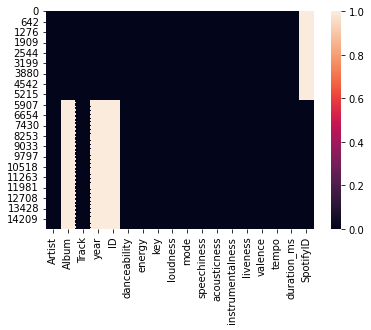

In [ ]:
sns.heatmap(MSD_Billboard1.isnull())
plt.show()

In [ ]:
MSD_Billboard1.isnull().sum()

Artist                 2
Album               7159
Track                  1
ID                  7159
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
duration_ms            0
SpotifyID           4960
dtype: int64

In [ ]:
MSD_Billboard1.drop(columns=['year'],inplace=True)

In [ ]:
MSD_Billboard1.shape

(12119, 17)

In [ ]:
MSD_Billboard1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12119 entries, 0 to 14931
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            12117 non-null  object 
 1   Album             4960 non-null   object 
 2   Track             12118 non-null  object 
 3   ID                4960 non-null   object 
 4   danceability      12119 non-null  float64
 5   energy            12119 non-null  float64
 6   key               12119 non-null  int64  
 7   loudness          12119 non-null  float64
 8   mode              12119 non-null  int64  
 9   speechiness       12119 non-null  float64
 10  acousticness      12119 non-null  float64
 11  instrumentalness  12119 non-null  float64
 12  liveness          12119 non-null  float64
 13  valence           12119 non-null  float64
 14  tempo             12119 non-null  float64
 15  duration_ms       12119 non-null  int64  
 16  SpotifyID         7159 non-null   object

In [ ]:
MSD_Billboard1.isnull().sum()

Artist                 2
Album               7159
Track                  1
ID                  7159
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
duration_ms            0
SpotifyID           4960
dtype: int64

In [ ]:
MSD_Billboard1.drop_duplicates(subset='ID', keep =False, inplace=True)
MSD_Billboard1.shape

(4956, 17)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
MSD_Billboard1.columns

Index(['Artist', 'Album', 'Track', 'ID', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'SpotifyID'],
      dtype='object')

In [ ]:
print(MSD_Billboard1['mode'].value_counts())

1    3394
0    1562
Name: mode, dtype: int64


In [ ]:
MSD_Billboard1.pop('ID')
MSD_Billboard1.pop('Artist')
MSD_Billboard1.pop('Album')
MSD_Billboard1.pop('Track')

MSD_Billboard1.rename(columns={'mode':'hit'}, inplace = True)
target_column = MSD_Billboard1.pop('hit')
MSD_Billboard1.insert(11,'hit',target_column)
Dff1= MSD_Billboard1
Dff1.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,hit,SpotifyID
0,0.699,0.519,8,-6.422,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027,1,NaN
1,0.458,0.570,5,-9.159,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907,0,NaN
2,0.751,0.549,6,-10.508,0.4290,0.063000,0.000025,0.1060,0.553,92.224,218933,0,NaN
3,0.456,0.472,5,-8.328,0.0325,0.706000,0.000005,0.0833,0.286,147.565,267640,1,NaN
4,0.498,0.300,7,-10.716,0.0352,0.553000,0.000116,0.0963,0.185,100.315,189560,1,NaN


In [ ]:
X = Dff1.iloc[:,:11]
y = Dff1.hit

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25)
y_train.shape


(3717,)

In [ ]:
from sklearn import ensemble
rf_classifier= ensemble.RandomForestClassifier()
rf_classifier.fit(X_train,y_train)
rf_classifier.score(X_test,y_test)

0.6844229217110573

In [ ]:
from sklearn.svm import SVC
sv_clf=SVC(probability=True)
sv_clf.fit(X_train,y_train)
sv_clf.score(X_test,y_test)

0.6698950766747377